## KMean with 4 clusters, with normaliced data
The values of the centers are at the end, converge at 15th iteration

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler


### Import data, divide by train and test sets, plot data to train

In [2]:
file_to_read="data_full_banknote.txt"
df_full_banknote=pd.read_csv(file_to_read)
# delete duplicated there is not null values
df_full_banknote= df_full_banknote.drop_duplicates()
# put the headers
df_full_banknote.columns=["V1", "V2", "V3", "V4", "class"]
df_full_banknote.drop(["V3", "V4"],axis=1, inplace=True)
df_train_Kmeans, df_test_kmeans = train_test_split(df_full_banknote, test_size = 0.20)
print("data to train kmeans: ", len(df_train_Kmeans))
print("data to test kmean: ", len(df_test_kmeans))

data to train kmeans:  1077
data to test kmean:  270


In [3]:
# Initial data 
df_train_Kmeans.drop(["class"],axis=1, inplace=True)
# Scale robust due to outliers in data
#from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(df_train_Kmeans)
np_train_scaled=transformer.transform(df_train_Kmeans)


#### data for train the model X_bank

In [4]:
X_bank=np.array(df_train_Kmeans)

In [5]:
#to define start points to my clusters , instead kmeans++ or random in KMeans from sklearn. 
#I make my own tester using random data


k=4

centers_C1= X_bank[115]
centers_C2= X_bank[450]
centers_C3= X_bank[590]
centers_C4= X_bank[860]


dist_1=[np.linalg.norm(xy- centers_C1) for xy in X_bank]
dist_2=[np.linalg.norm(xy- centers_C2) for xy in X_bank] 
dist_3=[np.linalg.norm(xy- centers_C3) for xy in X_bank]
dist_4=[np.linalg.norm(xy- centers_C4) for xy in X_bank]

n_cluster=[np.linalg.norm(xy- xy) for xy in X_bank]

data_cluster=np.column_stack((X_bank[:,0], X_bank[:,1], dist_1, dist_2, dist_3, dist_4 , n_cluster))


for indice,elemento  in enumerate(data_cluster):
    
    data_cluster[indice,6]=np.argmin(data_cluster[indice,2:6])

df_bank=pd.DataFrame(data_cluster)
df_bank.columns=["V1", "V2", "dist_1" , "dist_2", "dist_3", "dist_4" , "n_cluster" ]
df_bank.drop(["dist_1" , "dist_2", "dist_3", "dist_4"],axis=1, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

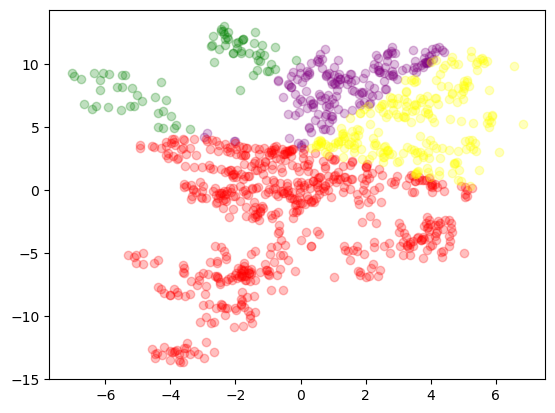

In [6]:
#k=1
cluster1=df_bank[df_bank["n_cluster"]==0]
cluster2=df_bank[df_bank["n_cluster"]==1]
cluster3=df_bank[df_bank["n_cluster"]==2]
cluster4=df_bank[df_bank["n_cluster"]==3]
plt.scatter(cluster1["V1"], cluster1["V2"], c="purple", alpha=0.25)
plt.scatter(cluster2["V1"], cluster2["V2"], c="green", alpha=0.25)
plt.scatter(cluster3["V1"], cluster3["V2"], c="red", alpha=0.25)
plt.scatter(cluster4["V1"], cluster4["V2"], c="yellow", alpha=0.25)
#plt.scatter(X_bank[:,0], X_bank[:,1], c="purple", alpha=0.25)

plt.show

(2.7411563108303247, 7.972114079422383) (-3.128961320754717, 8.284277358490566) (-1.3382513295566503, -7.369295566502464) (0.6621106529531567, 0.9840684817050916)


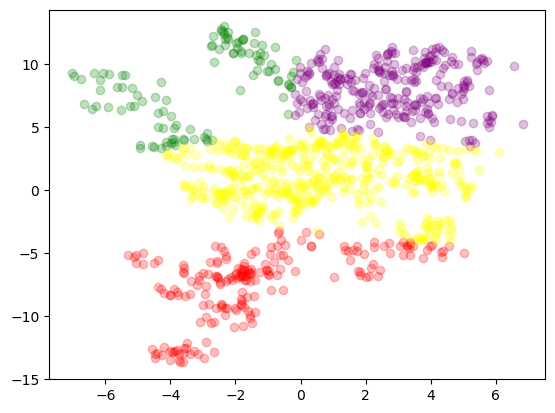

In [20]:

center_V1_C1=cluster1["V1"].sum() / len(cluster1)
center_V2_C1=cluster1["V2"].sum() / len(cluster1)
center_V1_C2=cluster2["V1"].sum() / len(cluster2)
center_V2_C2=cluster2["V2"].sum() / len(cluster2)
center_V1_C3=cluster3["V1"].sum() / len(cluster3)
center_V2_C3=cluster3["V2"].sum() / len(cluster3)
center_V1_C4=cluster4["V1"].sum() / len(cluster4)
center_V2_C4=cluster4["V2"].sum() / len(cluster4)


# Initial data 
X_bank=np.array(df_train_Kmeans)

centers_C1= (center_V1_C1, center_V2_C1)
centers_C2= (center_V1_C2, center_V2_C2)
centers_C3= (center_V1_C3, center_V2_C3)
centers_C4= (center_V1_C4, center_V2_C4)

print(centers_C1, centers_C2, centers_C3, centers_C4 )


dist_1=[np.linalg.norm(xy- centers_C1) for xy in X_bank]
dist_2=[np.linalg.norm(xy- centers_C2) for xy in X_bank] 
dist_3=[np.linalg.norm(xy- centers_C3) for xy in X_bank]
dist_4=[np.linalg.norm(xy- centers_C4) for xy in X_bank]

n_cluster=[np.linalg.norm(xy- xy) for xy in X_bank]

data_cluster=np.column_stack((X_bank[:,0], X_bank[:,1], dist_1, dist_2, dist_3, dist_4 , n_cluster))


for indice,elemento  in enumerate(data_cluster):
    data_cluster[indice,6]=np.argmin(data_cluster[indice,2:6])

df_bank=pd.DataFrame(data_cluster)
df_bank.columns=["V1", "V2", "dist_1" , "dist_2", "dist_3", "dist_4" , "n_cluster" ]
df_bank.drop(["dist_1" , "dist_2", "dist_3", "dist_4"],axis=1, inplace=True)

cluster1=df_bank[df_bank["n_cluster"]==0]
cluster2=df_bank[df_bank["n_cluster"]==1]
cluster3=df_bank[df_bank["n_cluster"]==2]
cluster4=df_bank[df_bank["n_cluster"]==3]
plt.scatter(cluster1["V1"], cluster1["V2"], c="purple", alpha=0.25)
plt.scatter(cluster2["V1"], cluster2["V2"], c="green", alpha=0.25)
plt.scatter(cluster3["V1"], cluster3["V2"], c="red", alpha=0.25)
plt.scatter(cluster4["V1"], cluster4["V2"], c="yellow", alpha=0.25)

$$
-2-
$$
(1.4803358393258426, 8.321230337078653) 
(-3.309836973684211, 9.474467105263159)
(-0.48527065100000005, -2.1427419091380004)
(3.409291165919283, 5.192942914798207)
$$
-3-
$$
(2.2080224905, 8.8444355) 
(-3.4177006999999993, 8.034968000000001) 
(-0.624951013253012, -3.0768003764714855)
(2.4819099831541216, 3.7042376774193553)
$$
-4-
$$
(2.550290795089286, 8.711984375) 
(-3.3356587931034483, 7.427175000000002) 
(-0.742048453789731, -4.094132457701711) 
(1.8299719765243903, 2.8508628040158537)
$$
-5-
$$
(2.680535624901186, 8.388420158102768)
(-3.287341581196581, 7.440488034188035) 
(-0.7657512870967742, -5.011319586510264) 
(1.2257550535519126, 2.1575743265497267)
$$
-6-
$$
(2.7025155843511453, 8.278944656488548) 
(-3.3000856306306305, 7.707501801801802) 
(-0.7108742782142857, -5.9910622857142855) 
(0.7980116240566038, 1.7134454351820754)
$$
-7-
$$
(2.708885879622642, 8.210161886792452) 
(-3.260327407407407, 7.948442592592593) 
(-0.763398312345679, -6.663415637860083) 
(0.6525555327548807, 1.428861007629501)
$$
-8-
$$
(2.718063559191176, 8.115845588235295) 
(-3.275146470588236, 8.19990098039216) 
(-0.935916098206278, -7.03325067264574) 
(0.5927555220833334, 1.2461138010775)
$$
-9-
$$
(2.7150501385454544, 8.06318618181818)
(-3.247773663366337, 8.298932673267329) 
(-1.0456403699074073, -7.156000462962964) 
(0.5944461455670104, 1.1623656175612371)
$$
-10-
$$
(2.752369626739927, 8.042487912087912) 
(-3.1617044230769222, 8.306639423076923)
(-1.1135047882629108, -7.20413427230047) 
(0.6071018082135522, 1.1265103172837783)
$$
-11-
$$
(2.771891384981685, 8.017542857142857) 
(-3.1327952380952384, 8.325829523809524) 
(-1.2055264110047845, -7.268755502392345) 
(0.6229262869387755, 1.0812004581983674)
$$
-12-
$$
(2.7553577385454546, 7.995096000000001) 
(-3.1327952380952384, 8.325829523809524) 
(-1.3146976465686275, -7.353134313725491) 
(0.6500611574036511, 1.0158124229557808)
$$
-13-
$$
(2.7411563108303247, 7.972114079422383)
(-3.128961320754717, 8.284277358490566)
(-1.3146976465686275, -7.353134313725491)
(0.6563870012244899, 0.9943878051371429)
$$
-14-
$$
(2.7411563108303247, 7.972114079422383) 
(-3.128961320754717, 8.284277358490566) 
(-1.3382513295566503, -7.369295566502464) 
(0.6621106529531567, 0.9840684817050916)
$$
-15-
$$
(2.7411563108303247, 7.972114079422383)
(-3.128961320754717, 8.284277358490566) 
(-1.3382513295566503, -7.369295566502464) 
(0.6621106529531567, 0.9840684817050916)
